In [18]:
# importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style('whitegrid', {'grid.linestyle':'--'})

In [19]:
# Reading in training and testing file

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
train.shape

(1460, 81)

In [23]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
test.shape

(1459, 80)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

There are many columns that have large number of null values that would need to be treated before prediction.

In [27]:
# combining the training and testing data sets 
train['dataset'] = 'Train'
test['dataset'] = 'Test'

df = pd.concat([train, test])

df.shape

(2919, 82)

In [28]:
df.set_index('Id', inplace=True)

## Exploratory Data Analysis

Looking at each variable to better understand how they relate to the Sale Price.

Some hypothesis of things that would impact Price are:
1. The size of the house in sqft and # of bedroom and bathrooms
2. The location of the house 
3. Age of the house
4. Condition of the house

For the exploratory analysis, I am splitting the variables into 11 categories:

1. Type of House: `MSSubClass, MSZoning, BldgType, HouseStyle`
2. Condition: `OverallQual, OverallCond, ExterQual, ExterCond, Functional, PoolQC, Fence`
3. Age: `YearBuilt, YearRemodAdd`
4. Utilites: `Utilities, Heating, HeatingQC, CentralAir, Electrical`
5. Location: `LotConfig, Neighborhood, Condition1, Condition2`
6. Size: `LotFrontage, LotArea, LowQualFinSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, PoolArea, EnclosedPorch, 3SsnPorch, ScreenPorch, 1stFlrSF, 2ndFlrSF`
7. Areas in the house: `Kitchen, KitchenQual, TotRmsAbvGrd, GarageType, GarageYrBuilt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond` 
8. Bedrooms/Bathrooms: `Bedrooms, BsmtFullBT, BsmtHalfBt, FullBath, HalfBath` 
9. Basement: `BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, TotBsmtSF, BsmtFinType2, BsmtFinSF2, BsmtUnfSF` 
10. Outside: `RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea`
11. Other: `Street, LotShape, Alley, Foundation, LandContour, FireplaceQu, Fireplace, LandSlope, MoSold, Yrsold, SaleType, SaleCondition`

In [29]:
# Checking for NULL Values in each column
null_columns = {}
total_rows = df.shape[0]

for i in df.columns:
    if df[i].isnull().sum() == 0:
        continue
    else:
        null_values = df[i].isnull().sum()
        null_columns[i] = round((null_values/total_rows)*100,2)

null_ser = pd.Series(null_columns)
print(null_ser.sort_values(ascending=False))

PoolQC          99.66
MiscFeature     96.40
Alley           93.22
Fence           80.44
SalePrice       49.98
FireplaceQu     48.65
LotFrontage     16.65
GarageCond       5.45
GarageYrBlt      5.45
GarageFinish     5.45
GarageQual       5.45
GarageType       5.38
BsmtExposure     2.81
BsmtCond         2.81
BsmtQual         2.77
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
Functional       0.07
BsmtHalfBath     0.07
BsmtFullBath     0.07
Utilities        0.07
KitchenQual      0.03
TotalBsmtSF      0.03
BsmtUnfSF        0.03
GarageCars       0.03
GarageArea       0.03
BsmtFinSF2       0.03
BsmtFinSF1       0.03
Exterior2nd      0.03
Exterior1st      0.03
SaleType         0.03
Electrical       0.03
dtype: float64


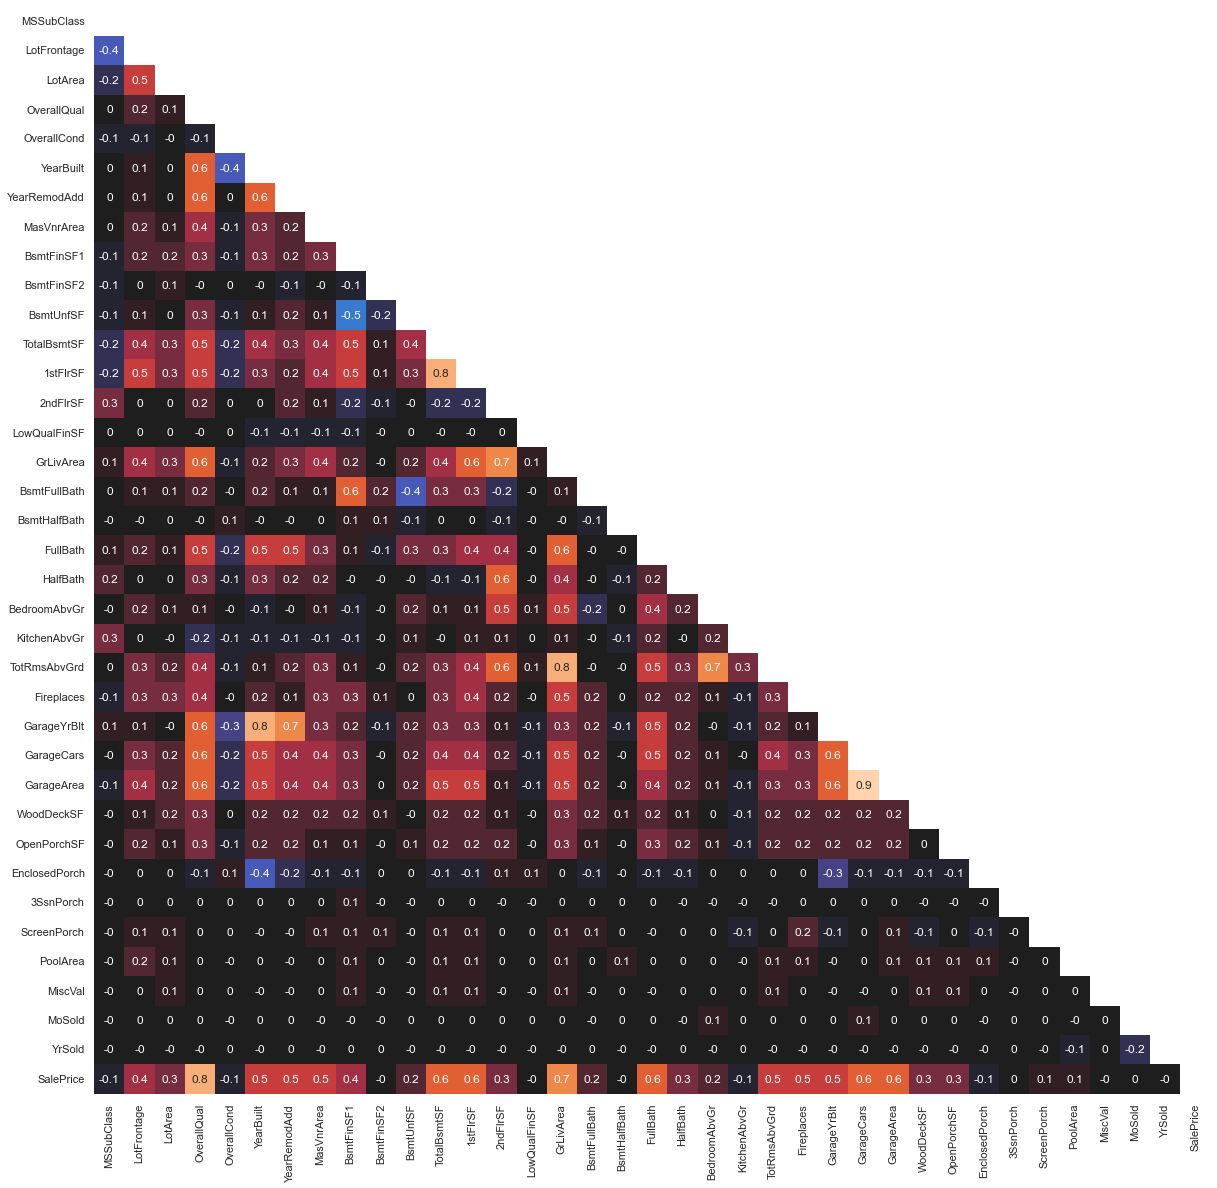

In [30]:
# Checking for relationships between variables 
fig, axs = plt.subplots(1,1,figsize=(20,20))
corr = df.corr()
corr = corr.round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, 
                xticklabels=corr.columns.values, yticklabels=corr.columns.values,
                center=0, cbar=False, annot=True)

Based on the correlation matrix above, we can notice a few things:
1. Our initial hypothesis seems to be somewhat accurate. SalePrice is highly correlated with Qual, SF, # of rooms variables.
2. There are plenty of variables that are highly correlated with each other. There are also plenty of variables that are not related to any other variable.

## 1. Type of House

<b> Question: </b> What are the different types of dwellings in the dataset? How are they related to the Sale price of a house? How are the different variables associated with each other?

### MSSubClass: Identifies the type of dwelling involved in the sale.	

20:	1-STORY 1946 & NEWER ALL STYLES

30:	1-STORY 1945 & OLDER

40:	1-STORY W/FINISHED ATTIC ALL AGES

45:	1-1/2 STORY - UNFINISHED ALL AGES

50:	1-1/2 STORY FINISHED ALL AGES

60:	2-STORY 1946 & NEWER

70:	2-STORY 1945 & OLDER

75:	2-1/2 STORY ALL AGES

80:	SPLIT OR MULTI-LEVEL

85:	SPLIT FOYER

90:	DUPLEX - ALL STYLES AND AGES

120:	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

150:	1-1/2 STORY PUD - ALL AGES

160:	2-STORY PUD - 1946 & NEWER

180:	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

190:	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [31]:
# convert MSSubClass to a categorical variable
df['MSSubClass'] = df['MSSubClass'].astype('category')

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

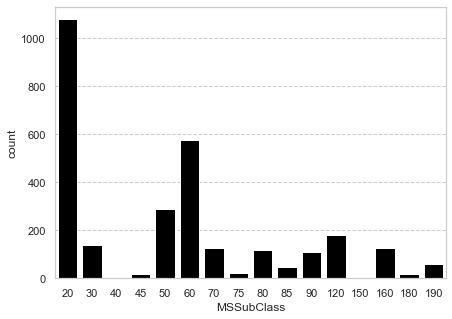

In [32]:
sns.countplot(x='MSSubClass', data=df, color='black')

In [33]:
df['MSSubClass'].value_counts(normalize=True)

20     0.369647
60     0.196985
50     0.098321
120    0.062350
30     0.047619
70     0.043851
160    0.043851
80     0.040425
90     0.037342
190    0.020898
85     0.016444
75     0.007879
45     0.006166
180    0.005824
40     0.002055
150    0.000343
Name: MSSubClass, dtype: float64

There are many sub classes that are less than 5% of overall row count. Grouping them into "Other Sub Class" bucket.

In [34]:
def MSSubClass_Groupings(value):
    if value == 20:
        return "1-STORY 1946 & NEWER ALL STYLES"
    elif value == 60:
        return "2-STORY 1946 & NEWER"
    elif value == 50:
        return "1-1/2 STORY FINISHED ALL AGES"
    elif value == 120:
        return "1-STORY PUD (Planned Unit Development) - 1946 & NEWER"
    else:
        return "Other Sub Class"
    
df['MSSubClass'] = df['MSSubClass'].apply(lambda x: MSSubClass_Groupings(x))

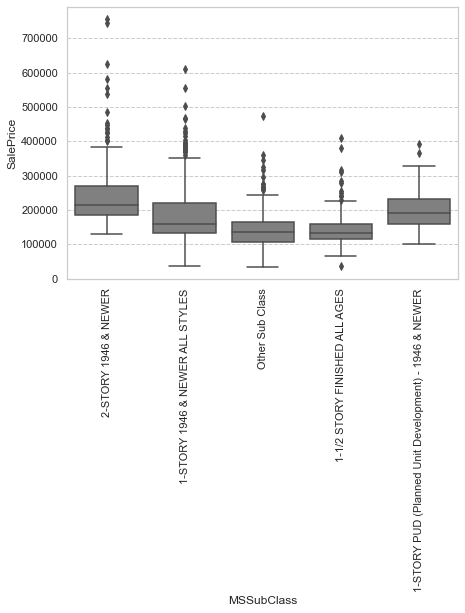

In [43]:
sns.boxplot(x='MSSubClass',y='SalePrice',data=df, color='grey')
plt.xticks(rotation=90)
plt.show()

------------------------------

### MSZoning: Identifies the general zoning classification of the sale.
		
A:	Agriculture

C:	Commercial

FV:	Floating Village Residential

I:	Industrial

RH:	Residential High Density

RL:	Residential Low Density

RP:	Residential Low Density Park 

RM:	Residential Medium Density 


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

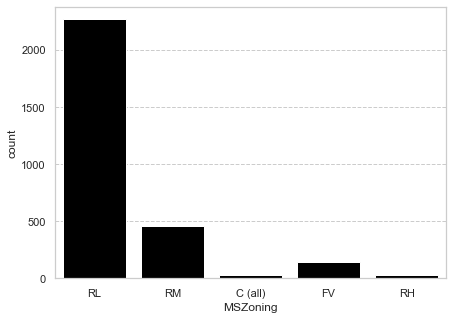

In [37]:
sns.countplot(x='MSZoning', data=df, color='black')

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

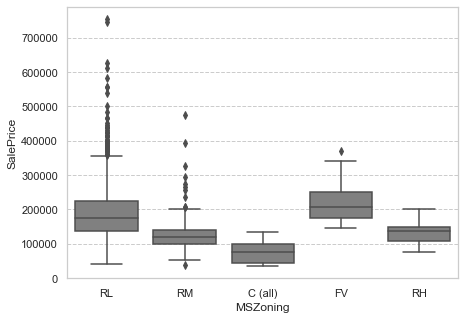

In [45]:
sns.boxplot(x='MSZoning',y='SalePrice',data=df, color='grey')

---------------------------

### BldgType: Type of dwelling

1Fam:	Single-family Detached	

2FmCon:	Two-family Conversion; originally built as one-family dwelling

Duplx:	Duplex

TwnhsE:	Townhouse End Unit

TwnhsI:	Townhouse Inside Unit


<AxesSubplot:xlabel='BldgType', ylabel='count'>

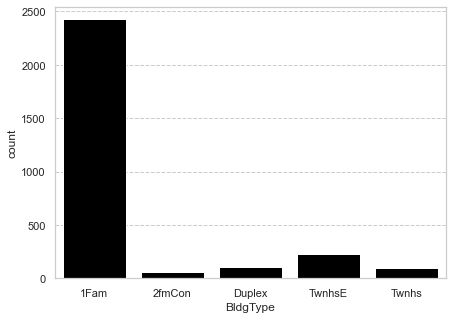

In [39]:
sns.countplot(x='BldgType', data=df, color='black')

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

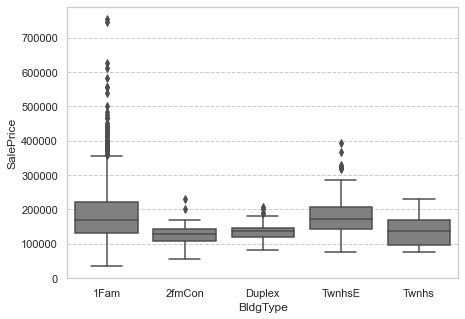

In [46]:
sns.boxplot(x='BldgType',y='SalePrice',data=df, color='grey')

### HouseStyle: : Style of dwelling
	
1Story:	One story

1.5Fin:	One and one-half story: 2nd level finished

1.5Unf:	One and one-half story: 2nd level unfinished

2Story:	Two story

2.5Fin:	Two and one-half story: 2nd level finished

2.5Unf:	Two and one-half story: 2nd level unfinished

SFoyer:	Split Foyer

SLvl:	Split Level

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

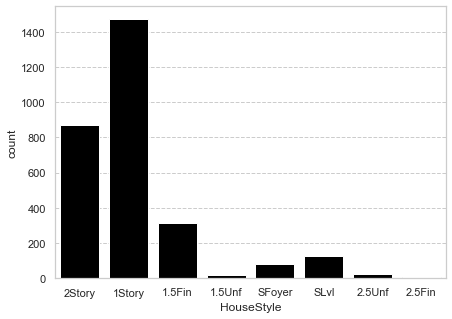

In [47]:
sns.countplot(x='HouseStyle',data=df,color='black')

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

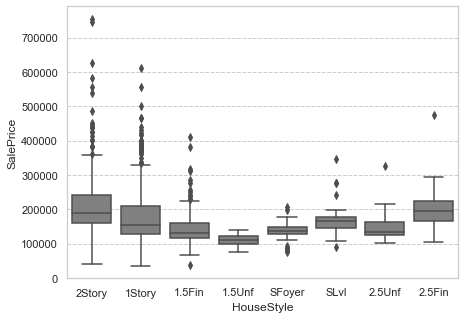

In [48]:
sns.boxplot(x='HouseStyle',y='SalePrice',data=df,color='grey')

### Relationship between the 4 variables

In [50]:
pd.crosstab(df['MSSubClass'], df['BldgType']).T

MSSubClass,1-1/2 STORY FINISHED ALL AGES,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,2-STORY 1946 & NEWER,Other Sub Class
BldgType,,,,,
1Fam,287,1077,5,574,482
2fmCon,0,1,0,1,60
Duplex,0,0,0,0,109
Twnhs,0,0,15,0,81
TwnhsE,0,1,162,0,64


In [51]:
pd.crosstab(df['MSSubClass'], df['HouseStyle']).T

MSSubClass,1-1/2 STORY FINISHED ALL AGES,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,2-STORY 1946 & NEWER,Other Sub Class
HouseStyle,,,,,
1.5Fin,282,0,0,1,31
1.5Unf,1,0,0,0,18
1Story,0,1077,180,0,214
2.5Fin,0,0,0,0,8
2.5Unf,0,0,0,1,23
2Story,4,1,0,572,295
SFoyer,0,0,2,0,81
SLvl,0,1,0,1,126


In [52]:
pd.crosstab(df['HouseStyle'], df['BldgType']).T

HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
BldgType,,,,,,,,
1Fam,289,18,1222,7,18,703,48,120
2fmCon,19,1,16,1,4,18,2,1
Duplex,5,0,57,0,2,25,19,1
Twnhs,1,0,15,0,0,70,6,4
TwnhsE,0,0,161,0,0,56,8,2


In [53]:
pd.crosstab(df['MSSubClass'], df['MSZoning']).T

MSSubClass,1-1/2 STORY FINISHED ALL AGES,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,2-STORY 1946 & NEWER,Other Sub Class
MSZoning,,,,,
C (all),7,3,0,0,15
FV,0,34,19,43,43
RH,2,4,6,0,14
RL,159,1016,117,529,444
RM,119,20,40,3,278


#### LotFrontage/LotArear
What is Frontage?
In real estate, frontage is the width of a lot, measured at the front part of the lot. The term frontage appears on most real estate listings – sometimes abbreviated as ‘Frntg’. There are typically two measurements for a lot, the frontage and depth. Sometimes ‘road’ or ‘street’ frontage is used to describe the width of a lot as well. In commercial real estate, frontage may be described as ‘front foot’.

<b> Question: </b> What is the relationship between LotFrontage and Sale Price? Is there a relationship between LotFrontage and LotSize? Are there certain types of residences that have a larger LotFrontage?

Answer: There is some correlation between Saleprice and LotFrontage (35%) and a strong correlation between LotFrontage and LotArea (~50%). The 1 and 2 story newer buildings tend to have higher LotFrontage compared to other types of dwellings, which makes sense since they tend to be more expensive as well. 

In [52]:
df[['LotFrontage','LotArea']].describe()

,LotFrontage,LotArea
count,2433.000000,2919.000000
mean,69.305795,10168.114080
std,23.344905,7886.996359
min,21.000000,1300.000000
25%,59.000000,7478.000000
50%,68.000000,9453.000000
75%,80.000000,11570.000000
max,313.000000,215245.000000


Couple of things to note here:

- There are many NULL values. Probably associated with lots with no frontage. A question to answer here would be: does this impact the saleprice? 
- There seem to be certain values that look like outliers. The 75th percentile is at 80 feet, but the max is 313ft. 

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

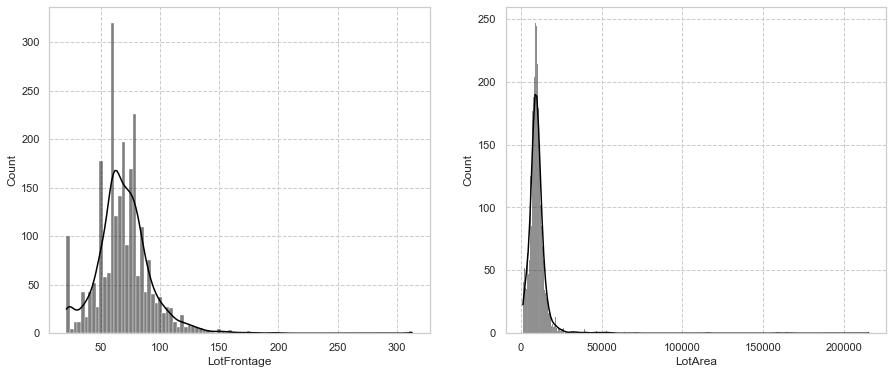

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.histplot(x='LotFrontage', data=df, color='black', kde=True, ax=axs[0])
sns.histplot(x='LotArea', data=df, color='black', kde=True, ax=axs[1])

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

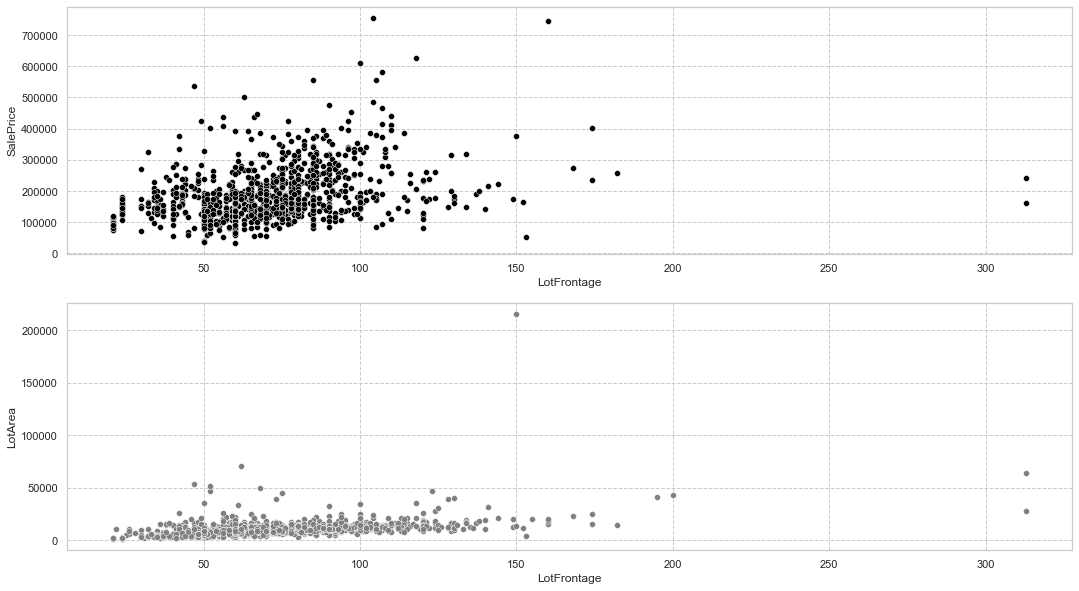

In [55]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18,10))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df, color='black', ax=axs[0])
sns.scatterplot(x='LotFrontage', y='LotArea', data=df, color='grey', ax=axs[1])

In [56]:
df[['SalePrice', 'LotFrontage', 'LotArea']].corr()

,SalePrice,LotFrontage,LotArea
SalePrice,1.000000,0.351799,0.263843
LotFrontage,0.351799,1.000000,0.489896
LotArea,0.263843,0.489896,1.000000


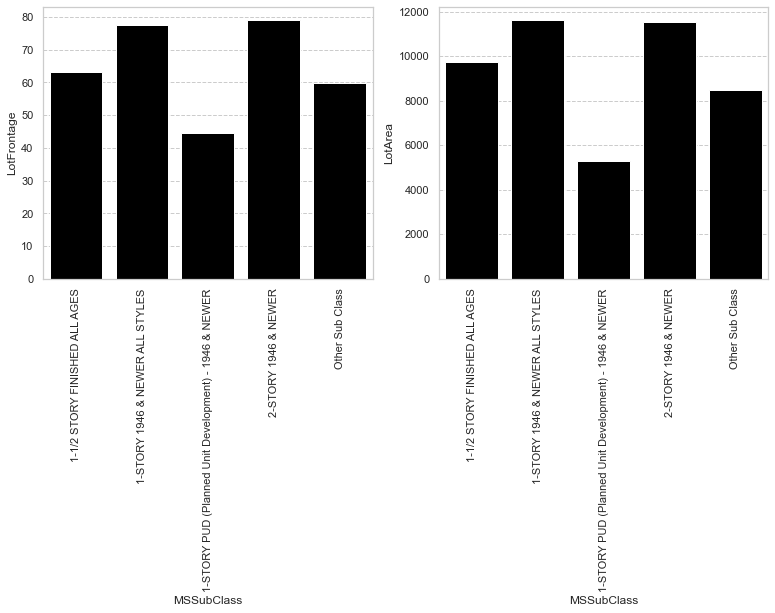

In [57]:
# Looking whether certain types of houses have larger lotfrontage/lotarea 
lot_frontage = df.groupby(['MSSubClass'], as_index=False).agg({'LotFrontage':'mean', 'LotArea':'mean'})

# Plotting 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.barplot(x='MSSubClass',y='LotFrontage',data=lot_frontage,ax=axs[0],color='black')
sns.barplot(x='MSSubClass',y='LotArea',data=lot_frontage,ax=axs[1],color='black')
axs[0].tick_params('x',labelrotation=90)
axs[1].tick_params('x',labelrotation=90)

#### Street: Type of road access to property

<b>Question:</b> Does the type of steet have any impact on SalePrice?

Paved streets tend to be priced higher than Gravel streets. There are plenty of outliers for paved streets that make them unusually more expensive. 

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

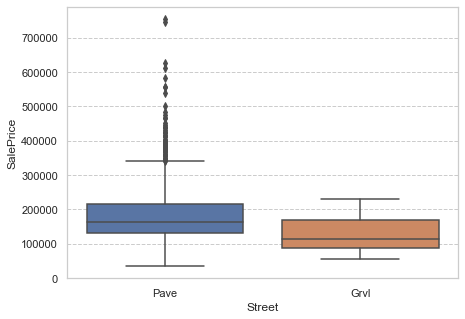

In [62]:
sns.boxplot(x='Street',y='SalePrice', data=df)